In [2]:
#coding=utf-8
'''
TopQuant-简称TQ极宽智能量化回溯分析系统，培训课件-配套教学python课件程序

Top极宽量化(原zw量化)，Python量化第一品牌 
by Top极宽·量化开源团队 2017.10.1 首发

网站： www.TopQuant.vip      www.ziwang.com
QQ群: Top极宽量化1群，124134140
      Top极宽量化2群，650924099
      Top极宽量化3群，450853713

'''


import sys;
sys.path.append("/Users/miaoyuesun/Code_Workspace/brad_public_workspace_mac/极宽/Top极宽&零起点系列配套资源/kb_demo/topqt")
#
path = "/Users/miaoyuesun/Code_Workspace/brad_public_workspace_mac/极宽/Top极宽&零起点系列配套资源/kb_demo/"
import pandas as pd

#
import zsys
import ztools as zt
import ztools_str as zstr
import ztools_web as zweb
import ztools_data as zdat
import ztools_draw as zdr
import ztools_ai as zai
import zpd_talib as zta

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Pre-processing/Split Data: kb305_tds01.py

In [4]:
#1 Reading data..
print('#1,rd data')
fss=path+'/data/sh2018.csv'
xdf=pd.read_csv(fss,index_col=0)
xdf=xdf.sort_index()
zt.prDF('xdf',xdf)

#1,rd data

 xdf
              open    high   close     low     volume      amount
date                                                             
1994-01-03  837.70  840.65  833.90  831.66  101005600  1048326000
1994-01-04  835.97  836.97  832.69  829.89   65274300   692748000
1994-01-05  829.30  847.05  846.98  823.10   89412100   975053000
1994-01-06  850.78  869.33  869.33  850.78  184511700  1970032000
1994-01-07  875.18  883.99  879.64  873.01  168688400  1752262000
1994-01-10  891.99  900.30  900.30  889.73  187595100  1896704000
1994-01-11  903.54  907.09  891.79  884.00  136850000  1590901000
1994-01-12  891.83  900.23  888.04  885.88  127429900  1306063000
1994-01-13  889.02  899.14  897.46  888.80   80792100   838602000
1994-01-14  900.13  900.99  849.23  842.62  242925400  2505558000

               open     high    close      low       volume        amount
date                                                                     
2018-05-11  3179.80  3180.76  3163.26  316

In [6]:
xdf.tail()

,open,high,close,low,volume,amount
date,,,,,,
2018-05-18,3151.082,3193.453,3193.303,3144.776,13651691800,168038057477
2018-05-21,3206.176,3219.740,3213.840,3203.336,16445941300,202663464515
2018-05-22,3211.247,3214.589,3214.350,3192.228,14429268400,185721667752
2018-05-23,3205.437,3205.437,3168.964,3168.964,15780764800,199358101015
2018-05-24,3167.939,3173.531,3154.651,3152.069,12408580000,160658185502


In [7]:
#2. shift the ['close'] column to create a new column called ['y']
print('#2,xed data')
xdf['y']=xdf['close'].shift(-1)
zt.prDF('xdf#2.1',xdf)

#2.2 fill NaN by padding the last value forward.
xdf.fillna(method='pad',inplace=True)
zt.prDF('xdf#2.2',xdf)

#2,xed data

 xdf#2.1
              open    high   close     low     volume      amount       y
date                                                                     
1994-01-03  837.70  840.65  833.90  831.66  101005600  1048326000  832.69
1994-01-04  835.97  836.97  832.69  829.89   65274300   692748000  846.98
1994-01-05  829.30  847.05  846.98  823.10   89412100   975053000  869.33
1994-01-06  850.78  869.33  869.33  850.78  184511700  1970032000  879.64
1994-01-07  875.18  883.99  879.64  873.01  168688400  1752262000  900.30
1994-01-10  891.99  900.30  900.30  889.73  187595100  1896704000  891.79
1994-01-11  903.54  907.09  891.79  884.00  136850000  1590901000  888.04
1994-01-12  891.83  900.23  888.04  885.88  127429900  1306063000  897.46
1994-01-13  889.02  899.14  897.46  888.80   80792100   838602000  849.23
1994-01-14  900.13  900.99  849.23  842.62  242925400  2505558000  859.28

               open     high    close      low       volume        amount        y
date  

In [8]:
# as we can see the last two rows of the columns are the same, both are 3154.651
xdf.tail()

,open,high,close,low,volume,amount,y
date,,,,,,,
2018-05-18,3151.082,3193.453,3193.303,3144.776,13651691800,168038057477,3213.840
2018-05-21,3206.176,3219.740,3213.840,3203.336,16445941300,202663464515,3214.350
2018-05-22,3211.247,3214.589,3214.350,3192.228,14429268400,185721667752,3168.964
2018-05-23,3205.437,3205.437,3168.964,3168.964,15780764800,199358101015,3154.651
2018-05-24,3167.939,3173.531,3154.651,3152.069,12408580000,160658185502,3154.651


In [9]:
#3.1 training data...
print('#3,cut data')
tim0str,tim9str='2010-10-10','2017-12-31'
df_train=zdat.df_kcut8tim(xdf,'',tim0str,tim9str)
zt.prDF('#3.1 df_train\n',df_train)
#
#3.2 testing data...
df_test=xdf[xdf.index>'2018'] #.tail(100)
zt.prDF('#3.2 df_test\n',df_test)

#-----------------------    
print('\nok!')

#3,cut data

 #3.1 df_train

               open     high    close      low       volume        amount        y
date                                                                              
2010-10-11  2755.03  2823.60  2806.94  2755.03  20753526400  253469818880  2841.41
2010-10-12  2795.76  2843.43  2841.41  2782.34  16742832000  211787464704  2861.36
2010-10-13  2842.14  2862.04  2861.36  2826.22  18528166400  228385390592  2879.64
2010-10-14  2881.55  2919.41  2879.64  2864.52  22946171200  264682455040  2971.16
2010-10-15  2863.74  2971.16  2971.16  2858.22  23656856000  272950771712  2955.23
2010-10-18  2985.46  3026.10  2955.23  2944.72  26331694400  301231079424  3001.85
2010-10-19  2949.63  3002.37  3001.85  2931.91  17066782400  199628275712  3003.95
2010-10-20  2947.51  3041.15  3003.95  2942.50  20780441600  262064865280  2983.53
2010-10-21  3009.22  3018.24  2983.53  2958.55  16143614400  205073039360  2975.04
2010-10-22  2976.75  2997.62  2975.04  2954.62  1470798880

In [18]:
zdat.df_kcut8tim?

In [19]:
def df_get8tim(df,ksgn,kpre,kn9,kpos):
    #@ zdr.dr_df_get8tim
    #
    xdf=pd.DataFrame(columns=['nam','dnum'])
    ds=pd.Series(['',0],index=['nam','dnum'])
    for xc in range(1,kn9+1):
        xss,kss='{0:02d}'.format(xc),'{0}{1:02d}'.format(kpre,xc)
        df2=df[df[ksgn].str.find(kss)==kpos]
        ds['nam'],ds['dnum']=xss,len(df2['gid'])
        xdf=xdf.append(ds.T,ignore_index=True)
        #print(xc,'#',xss,kss)
    #
    xdf.index=xdf['nam']
    return xdf

In [21]:
df_train

,open,high,close,low,volume,amount,y
date,,,,,,,
2010-10-11,2755.026,2823.597,2806.942,2755.026,20753526400,253469818880,2841.407
2010-10-12,2795.764,2843.428,2841.407,2782.341,16742832000,211787464704,2861.361
2010-10-13,2842.138,2862.035,2861.361,2826.221,18528166400,228385390592,2879.636
2010-10-14,2881.552,2919.414,2879.636,2864.519,22946171200,264682455040,2971.160
2010-10-15,2863.738,2971.160,2971.160,2858.216,23656856000,272950771712,2955.227
2010-10-18,2985.462,3026.099,2955.227,2944.715,26331694400,301231079424,3001.853
2010-10-19,2949.630,3002.371,3001.853,2931.910,17066782400,199628275712,3003.951
2010-10-20,2947.511,3041.151,3003.951,2942.505,20780441600,262064865280,2983.533
2010-10-21,3009.225,3018.244,2983.533,2958.546,16143614400,205073039360,2975.043


In [17]:
df_test[['close', 'y']].tail()

,close,y
date,,
2018-05-18,3193.303,3213.840
2018-05-21,3213.840,3214.350
2018-05-22,3214.350,3168.964
2018-05-23,3168.964,3154.651
2018-05-24,3154.651,3154.651


In [22]:
#4.1 Before using ml packages, we still need to define a list:

clst = ['open', 'high', 'low', 'close']

In [27]:
#4.2 create elements for machine learning applications.

x_train = df_train[clst].values
y_train = df_train['y'].values
x_test = df_test[clst].values
y_test = df_test['y'].values

# 2. Linear Regression Application: kb401-ln.py

In [31]:
from sklearn import linear_model

In [32]:
# 5 Select and set up the model
print("#5, 模型设置")
mx = linear_model.LinearRegression()

#5, 模型设置


In [35]:
# 6 Train the model and ask the model to fit the data
print("#6, 训练模型")
mx.fit(x_train, y_train)

#6, 训练模型


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

7#, predict模型预测数据

 df
               open     high    close      low       volume        amount        y  y_test2       y2
date                                                                                                
2018-01-02  3314.03  3349.05  3348.33  3314.03  20227886000  227788461113  3369.11  3350.08  3350.08
2018-01-03  3347.74  3379.92  3369.11  3345.29  21383614900  258366523235  3385.71  3370.36  3370.36
2018-01-04  3371.00  3392.83  3385.71  3365.30  20695528800  243090768694  3391.75  3384.97  3384.97
2018-01-05  3386.46  3402.07  3391.75  3380.24  21306068100  248187840542  3409.48  3390.09  3390.09
2018-01-08  3391.55  3412.73  3409.48  3384.56  23616510600  286213219095  3413.90  3408.34  3408.34
2018-01-09  3406.11  3417.23  3413.90  3403.59  19148855100  238249975070  3421.83  3411.70  3411.70
2018-01-10  3414.11  3430.21  3421.83  3398.84  20909499700  254515441261  3425.34  3419.21  3419.21
2018-01-11  3415.58  3426.48  3425.34  3405.64  17381213300  2184141

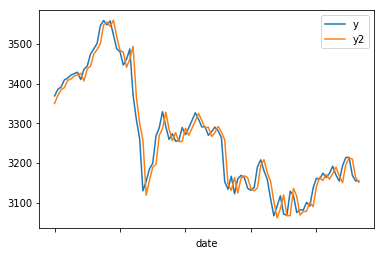

In [37]:
# 7
print ("7#, predict模型预测数据")
df_test['y2'] = mx.predict(x_test)
zt.prDF('df', df_test)
df_test[['y', 'y2']].plot()

In [40]:
df_test.tail()

,open,high,close,low,volume,amount,y,y2
date,,,,,,,,
2018-05-18,3151.082,3193.453,3193.303,3144.776,13651691800,168038057477,3213.840,3196.061700
2018-05-21,3206.176,3219.740,3213.840,3203.336,16445941300,202663464515,3214.350,3212.731292
2018-05-22,3211.247,3214.589,3214.350,3192.228,14429268400,185721667752,3168.964,3210.011938
2018-05-23,3205.437,3205.437,3168.964,3168.964,15780764800,199358101015,3154.651,3163.401626
2018-05-24,3167.939,3173.531,3154.651,3152.069,12408580000,160658185502,3154.651,3151.587539


In [41]:
# 8.1

print("#8, 验证模型预测效果")
print("\n#8.1, 按5%精度验证模型")
dacc,df=zai.ai_acc_xed2x(df_test['y'], df_test['y2'], 5, True)
print('acc', dacc)

#8, 验证模型预测效果

#8.1, 按5%精度验证模型
acc 100.0


In [42]:
# 8.1

print("#8, 验证模型预测效果")
print("\n#8.1, 按5%精度验证模型")
dacc,df=zai.ai_acc_xed2x(df_test['y'], df_test['y2'], 1, True)
print('acc', dacc)

#8, 验证模型预测效果

#8.1, 按5%精度验证模型
acc 73.404
